In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [15]:
start = '2014-01-01'
end = '2024-07-08'
stock = 'TCS.NS'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [16]:
data.reset_index(inplace=True)

In [17]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-01,1090.050049,1092.250000,1075.550049,1076.650024,866.627563,529952
1,2014-01-02,1083.000000,1094.500000,1078.074951,1083.500000,872.141296,1726948
2,2014-01-03,1082.349976,1114.550049,1073.625000,1111.099976,894.357178,2618174
3,2014-01-06,1114.500000,1122.000000,1098.500000,1119.800049,901.360229,2311810
4,2014-01-07,1120.000000,1128.224976,1099.500000,1103.074951,887.897644,2897486
...,...,...,...,...,...,...,...
2585,2024-07-01,3884.000000,4001.699951,3884.000000,3978.199951,3978.199951,2658723
2586,2024-07-02,3993.600098,4023.399902,3982.550049,4017.399902,4017.399902,2307449
2587,2024-07-03,4020.000000,4026.100098,3955.000000,3965.250000,3965.250000,1821198
2588,2024-07-04,3999.850098,4047.350098,3982.100098,4020.949951,4020.949951,2518001


In [18]:
ma_100_days = data.Close.rolling(100).mean()

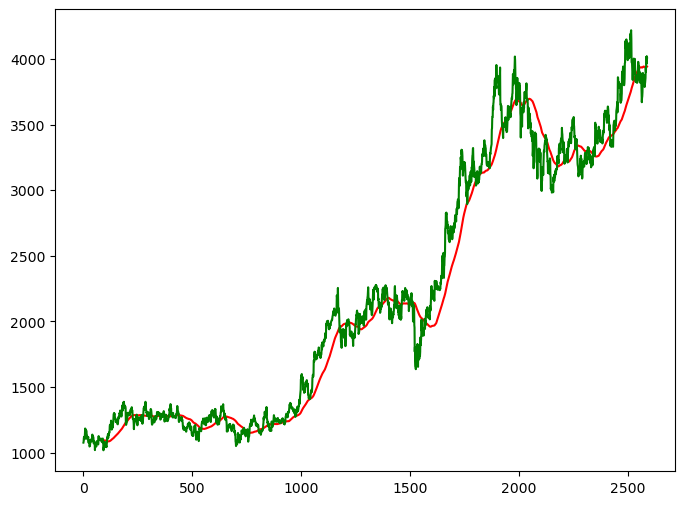

In [19]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [20]:
ma_200_days = data.Close.rolling(200).mean()

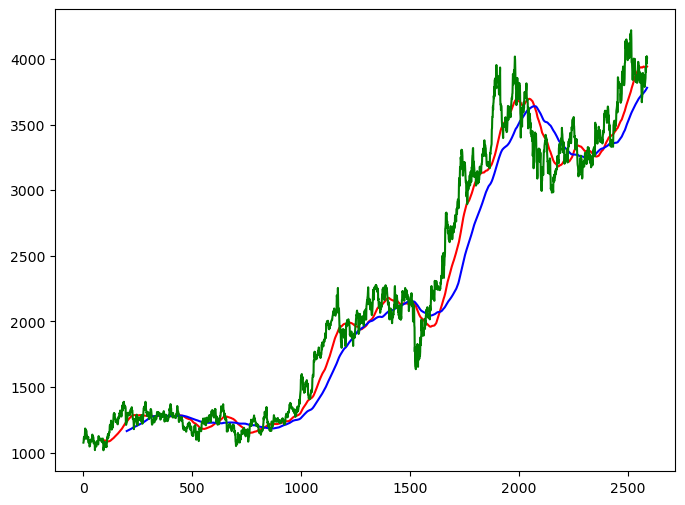

In [21]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [22]:
data.dropna(inplace=True)

In [23]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [24]:
data_train.shape[0]

2072

In [25]:
data_test.shape[0]

518

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
data_train_scale = scaler.fit_transform(data_train)

In [28]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [29]:
x, y = np.array(x), np.array(y)

In [30]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [31]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\vijay kumhar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [33]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 32s 313ms/step - loss: 0.0684
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 33s 538ms/step - loss: 0.0084
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 55s 761ms/step - loss: 0.0064
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 90s 880ms/step - loss: 0.0072
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 65s 582ms/step - loss: 0.0057
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 36s 500ms/step - loss: 0.0062
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 46s 582ms/step - loss: 0.0051
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 38s 527ms/step - loss: 0.0049
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 35s 562ms/step - loss: 0.0045
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 52s 721ms/step - loss: 0.0039
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 66s 459ms/step - loss: 0.0043
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 44s 493ms/step - loss: 0.0037
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 36s 410ms/step - loss: 0.0039
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 53s 604ms/step - loss: 0.0037
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [35]:
pas_100_days = data_train.tail(100)

In [36]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [37]:
data_test_scale  =  scaler.fit_transform(data_test)

In [38]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [39]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step


In [40]:
scale =1/scaler.scale_

In [41]:
y_predict = y_predict*scale

In [42]:
y = y*scale

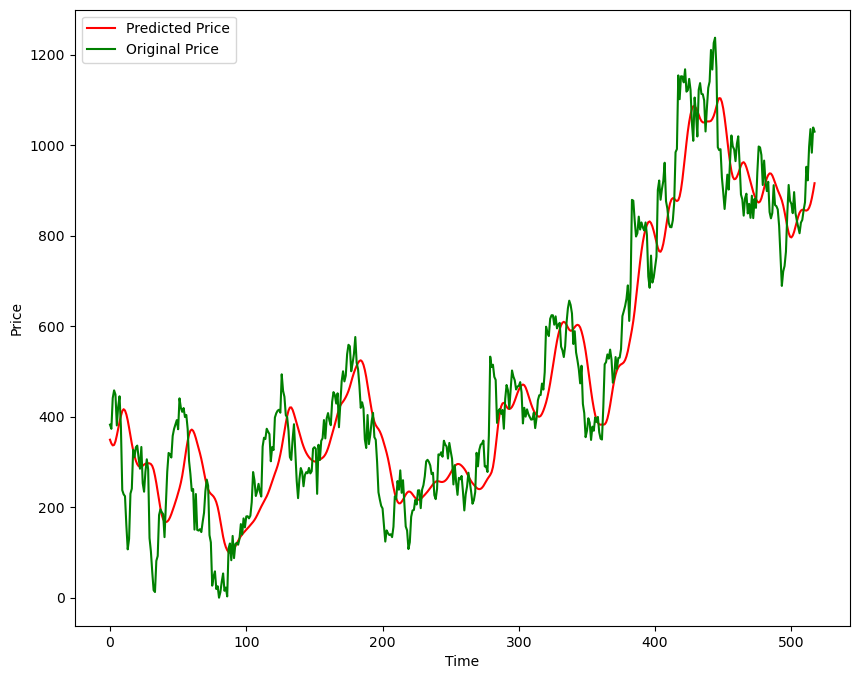

In [43]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [44]:
model.save('Stock Predictions Model.keras')